<a href="https://colab.research.google.com/github/Aftabbs/Fake-News-Detection-Using-NLP-and-BERT/blob/main/FakeNewDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Detection Using NLP and BERT transformers
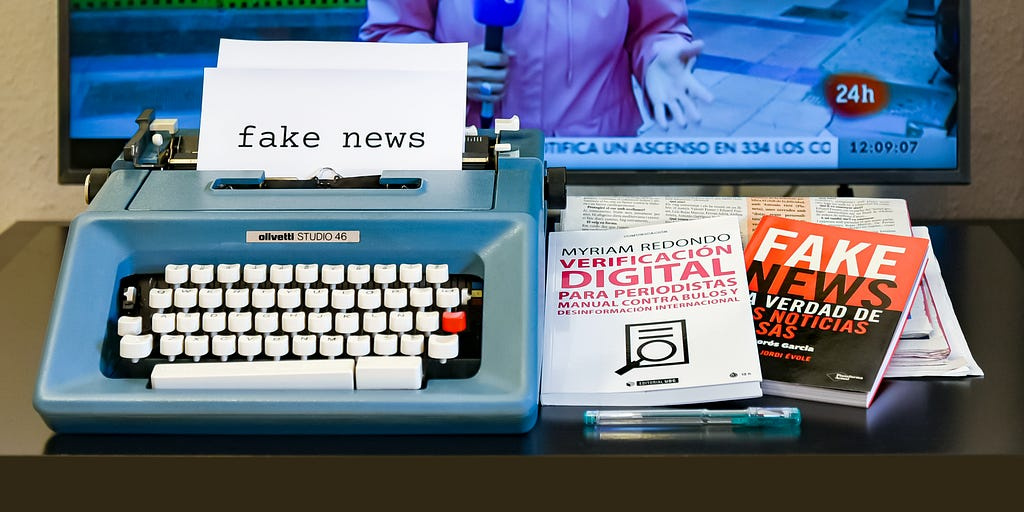
The rise of social media amplified the influence of Fake News in our society. People often perceive whatever they read/heard as True, and it is affecting the world on a large scale, both politically and financially. So Today We are going to develop a model that can Detect Fake News automatically using BERT Model and Python.

## Setting the  Environment

In [2]:
# Install specific libraries
! pip install transformers
! pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 121.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 87.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build w

In [3]:
import numpy as np
import pandas as pd
import pycaret
import transformers
from transformers import AutoModel, BertTokenizerFast
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch
import torch.nn as nn
device = torch.device("cuda")# gpu specify

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:

%cd  /content/drive/MyDrive/FakeNewsDetections /



/content/drive/MyDrive/FakeNewsDetections 


## Loading and Merging Both Dataset

In [9]:

true_data = pd.read_csv('_True.csv')
fake_data = pd.read_csv('Fake.csv')

true_data['Target'] = ['True']*len(true_data)
fake_data['Target'] = ['Fake']*len(fake_data)

data = true_data.append(fake_data).sample(frac=1).reset_index().drop(columns=['index'])

print(data.shape)
data.head()

(44898, 5)


,title,text,subject,date,Target
0,Progressive Lunacy: PETA Claims Indonesian Mon...,21st Century Wire says You know that western s...,Middle-east,"July 17, 2017",Fake
1,U.S. companies decry Trump action on transgend...,NEW YORK (Reuters) - U.S. companies led by tec...,politicsNews,"February 23, 2017",True
2,PAUL RYAN “BETRAYED” A Wealthy Businessman Who...,This is great! More citizens need to take it t...,politics,"Mar 28, 2016",Fake
3,"EUROPE CRASHES AND BURNS, As EU Officials FINA...",The Genie is out of the bottle. Europe will ne...,politics,"Feb 4, 2016",Fake
4,Turkish police arrest suspect in killing of Sy...,ISTANBUL (Reuters) - Turkish police arrested a...,worldnews,"September 30, 2017",True


In [10]:
# Encoding  the  Target column
data['label'] = pd.get_dummies(data.Target)['Fake']

In [11]:
data.head()

,title,text,subject,date,Target,label
0,Progressive Lunacy: PETA Claims Indonesian Mon...,21st Century Wire says You know that western s...,Middle-east,"July 17, 2017",Fake,1
1,U.S. companies decry Trump action on transgend...,NEW YORK (Reuters) - U.S. companies led by tec...,politicsNews,"February 23, 2017",True,0
2,PAUL RYAN “BETRAYED” A Wealthy Businessman Who...,This is great! More citizens need to take it t...,politics,"Mar 28, 2016",Fake,1
3,"EUROPE CRASHES AND BURNS, As EU Officials FINA...",The Genie is out of the bottle. Europe will ne...,politics,"Feb 4, 2016",Fake,1
4,Turkish police arrest suspect in killing of Sy...,ISTANBUL (Reuters) - Turkish police arrested a...,worldnews,"September 30, 2017",True,0


### Check for Imbalance in Target Column

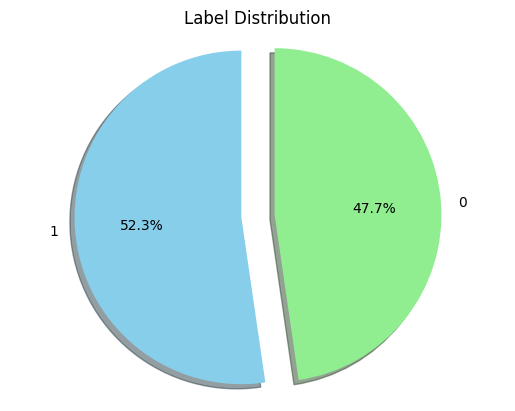

In [13]:
label_counts = data['label'].value_counts()
label_size = [label_counts[1], label_counts[0]]

colors =['skyblue', 'lightgreen']
explode = [0.1, 0.1]

plt.pie(label_size, explode=explode, colors=colors, startangle=90, shadow=True, labels=label_counts.index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Label Distribution')

plt.show()


## Splitting the Data for Train and Validation

In [14]:
# Train-Validation-Test set split into 70:15:15 ratio
# Train-Temp split
train_text, temp_text, train_labels, temp_labels = train_test_split(data['title'], data['label'],
                                                                    random_state=21,
                                                                    test_size=0.3,
                                                                    stratify=data['Target'])
# Test split
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                                                                random_state=20,
                                                                test_size=0.5,
                                                                stratify=temp_labels)

## BERT Fine-tuning
BERT (Bidirectional Encoder Representations from Transformers) is a powerful pre-trained language model that has been trained on a large corpus of text data. It has achieved state-of-the-art performance on various natural language processing (NLP) tasks, including text classification, named entity recognition, question answering, and more.

Fine-tuning BERT involves taking the pre-trained BERT model and adapting it to a specific downstream task, such as sentiment analysis, document classification, or fake news detection. This step is important because BERT has already learned rich representations of language from a large corpus, and by fine-tuning it on a specific task, we can leverage its knowledge and transfer it to our specific problem domain.

### Load pretrained BERT Model

In [15]:
# Load BERT model and tokenizer via HuggingFace Transformers
bert = AutoModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Preparing Input Data

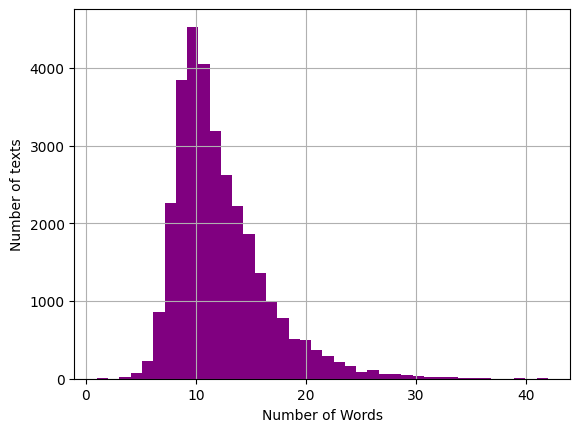

In [17]:
# Plot histogram of the number of words in train data 'title'
seq_len = [len(title.split()) for title in train_text]

pd.Series(seq_len).hist(bins = 40,color='purple')
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')
plt.show()

In [18]:
# BERT Tokeniser Functionality
sample_data = ["Build fake news model.",
               "Using bert."]                                         # sample data
tokenized_sample_data = tokenizer.batch_encode_plus(sample_data,
                                                    padding=True)     # encode text
print(tokenized_sample_data)

# Ref: https://huggingface.co/docs/transformers/preprocessing

{'input_ids': [[101, 3857, 8275, 2739, 2944, 1012, 102], [101, 2478, 14324, 1012, 102, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 0, 0]]}


In [19]:
# Majority of titles above have word length under 15. So, we set max title length as 15
MAX_LENGHT = 15
# Tokenize and encode sequences in the train set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

In [20]:
# Convert lists to tensors
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [21]:
# Data Loader structure definition
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = 32                                               #define a batch size

train_data = TensorDataset(train_seq, train_mask, train_y)    # wrap tensors
train_sampler = RandomSampler(train_data)                     # sampler for sampling the data during training
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
                                                              # dataLoader for train set
val_data = TensorDataset(val_seq, val_mask, val_y)            # wrap tensors
val_sampler = SequentialSampler(val_data)                     # sampler for sampling the data during training
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)
                                                              # dataLoader for validation set

### Freeze Layers

In [22]:
# Freezing the parameters and defining trainable BERT structure
for param in bert.parameters():
    param.requires_grad = False    # false here means gradient need not be computed

### Define Model Architecture (A Neural Network Architecture) To Understand in depth

In [23]:
class BERT_Arch(nn.Module):
    def __init__(self, bert):
      super(BERT_Arch, self).__init__()
      self.bert = bert
      self.dropout = nn.Dropout(0.1)            # dropout layer
      self.relu =  nn.ReLU()                    # relu activation function
      self.fc1 = nn.Linear(768,512)             # dense layer 1
      self.fc2 = nn.Linear(512,2)               # dense layer 2 (Output layer)
      self.softmax = nn.LogSoftmax(dim=1)       # softmax activation function
    def forward(self, sent_id, mask):           # define the forward pass
      cls_hs = self.bert(sent_id, attention_mask=mask)['pooler_output']
                                                # pass the inputs to the model
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)
      x = self.fc2(x)                           # output layer
      x = self.softmax(x)                       # apply softmax activation
      return x

model = BERT_Arch(bert)
# Defining the hyperparameters (optimizer, weights of the classes and the epochs)
# Define the optimizer
from transformers import AdamW
optimizer = AdamW(model.parameters(),
                  lr = 1e-5)          # learning rate
# Define the loss function
cross_entropy  = nn.NLLLoss()
# Number of training epochs
epochs = 2

### Define Train & Evaluate Function

In [24]:
# Defining training and evaluation functions
def train():
  model.train()
  total_loss, total_accuracy = 0, 0

  for step,batch in enumerate(train_dataloader):                # iterate over batches
    if step % 50 == 0 and not step == 0:                        # progress update after every 50 batches.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
    batch = [r for r in batch]                                  # push the batch to gpu
    sent_id, mask, labels = batch
    model.zero_grad()                                           # clear previously calculated gradients
    preds = model(sent_id, mask)                                # get model predictions for current batch
    loss = cross_entropy(preds, labels)                         # compute loss between actual & predicted values
    total_loss = total_loss + loss.item()                       # add on to the total loss
    loss.backward()                                             # backward pass to calculate the gradients
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)     # clip gradients to 1.0. It helps in preventing exploding gradient problem
    optimizer.step()                                            # update parameters
    preds=preds.detach().cpu().numpy()                          # model predictions are stored on GPU. So, push it to CPU

  avg_loss = total_loss / len(train_dataloader)                 # compute training loss of the epoch
                                                                # reshape predictions in form of (# samples, # classes)
  return avg_loss                                 # returns the loss and predictions

def evaluate():
  print("\nEvaluating...")
  model.eval()                                    # Deactivate dropout layers
  total_loss, total_accuracy = 0, 0
  for step,batch in enumerate(val_dataloader):    # Iterate over batches
    if step % 50 == 0 and not step == 0:          # Progress update every 50 batches.
                                                  # Calculate elapsed time in minutes.
                                                  # Elapsed = format_time(time.time() - t0)
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))
                                                  # Report progress
    batch = [t for t in batch]                    # Push the batch to GPU
    sent_id, mask, labels = batch
    with torch.no_grad():                         # Deactivate autograd
      preds = model(sent_id, mask)                # Model predictions
      loss = cross_entropy(preds,labels)          # Compute the validation loss between actual and predicted values
      total_loss = total_loss + loss.item()
      preds = preds.detach().cpu().numpy()
  avg_loss = total_loss / len(val_dataloader)         # compute the validation loss of the epoch
  return avg_loss

### Train The Model

In [25]:
# Train and predict
best_valid_loss = float('inf')
train_losses=[]                   # empty lists to store training and validation loss of each epoch
valid_losses=[]

for epoch in range(epochs):
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    train_loss = train()                       # train model
    valid_loss = evaluate()                    # evaluate model
    if valid_loss < best_valid_loss:              # save the best model
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'c2_new_model_weights.pt')
    train_losses.append(train_loss)               # append training and validation loss
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')

# Takes 30-40 mins to  Execute(depends of Processors)


 Epoch 1 / 2
  Batch    50  of    983.
  Batch   100  of    983.
  Batch   150  of    983.
  Batch   200  of    983.
  Batch   250  of    983.
  Batch   300  of    983.
  Batch   350  of    983.
  Batch   400  of    983.
  Batch   450  of    983.
  Batch   500  of    983.
  Batch   550  of    983.
  Batch   600  of    983.
  Batch   650  of    983.
  Batch   700  of    983.
  Batch   750  of    983.
  Batch   800  of    983.
  Batch   850  of    983.
  Batch   900  of    983.
  Batch   950  of    983.

Evaluating...
  Batch    50  of    211.
  Batch   100  of    211.
  Batch   150  of    211.
  Batch   200  of    211.

Training Loss: 0.559
Validation Loss: 0.493

 Epoch 2 / 2
  Batch    50  of    983.
  Batch   100  of    983.
  Batch   150  of    983.
  Batch   200  of    983.
  Batch   250  of    983.
  Batch   300  of    983.
  Batch   350  of    983.
  Batch   400  of    983.
  Batch   450  of    983.
  Batch   500  of    983.
  Batch   550  of    983.
  Batch   600  of    983.
  

### Evaluate The Model

In [26]:
# load weights of best model
path = 'fakenews_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [27]:
with torch.no_grad():
  preds = model(test_seq, test_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3212
           1       0.92      0.85      0.88      3523

    accuracy                           0.88      6735
   macro avg       0.88      0.88      0.88      6735
weighted avg       0.88      0.88      0.88      6735



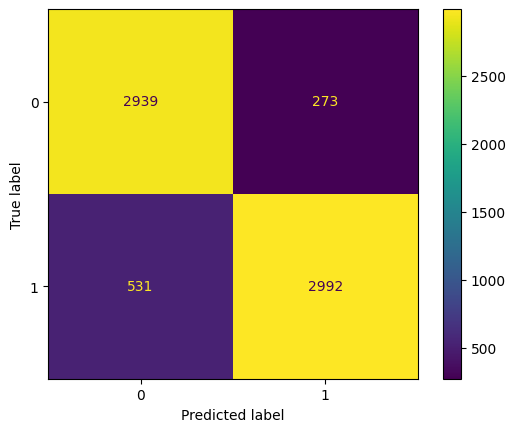

In [30]:
with torch.no_grad():
  preds = model(test_seq, test_mask)
  preds = preds.detach().cpu().numpy()
  preds = np.argmax(preds, axis = 1)
  print(ConfusionMatrixDisplay.from_predictions(test_y, preds))
plt.show()

## Fake News Predictions Testing on Unseen Data

In [28]:
# testing on unseen data
unseen_news_text = ["Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing",     # Fake(1)
                    "WATCH: George W. Bush Calls Out Trump For Supporting White Supremacy",               # Fake(1)
                    "U.S. lawmakers question businessman at 2016 Trump Tower meeting: sources",           # True(0)
                    "Trump administration issues new rules on U.S. visa waivers"                          # True(0)
                    ]

# tokenize and encode sequences in the test set
MAX_LENGHT = 15
tokens_unseen = tokenizer.batch_encode_plus(
    unseen_news_text,
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

unseen_seq = torch.tensor(tokens_unseen['input_ids'])
unseen_mask = torch.tensor(tokens_unseen['attention_mask'])

with torch.no_grad():
  preds = model(unseen_seq, unseen_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
preds

array([1, 1, 0, 0])

# CONCLUSION
The Model Has Succesfully be able to Predict even the Unseen Data .
The model achieves good performance in classifying between fake and true news articles, with high precision, recall, and F1-score for both classes. The classification report provides detailed metrics for the model's performance.

### Enhancements
* Fine-tune the model with additional data to improve performance.
* Experiment with different NLP techniques or transformer-based models.
* Implement a web interface or API for real-time fake news detection.

# Why Torch and BERT?
In this project, torch (PyTorch) and BERT (Bidirectional Encoder Representations from Transformers) have been utilized for several reasons:

### PyTorch (torch)
* PyTorch is a popular open-source deep learning framework that provides a flexible and efficient platform for building and training neural networks.
It offers dynamic computation graphs, making it easier to define and modify network architectures.
* PyTorch provides extensive support for GPU acceleration, allowing for faster model training and evaluation.
The rich ecosystem of PyTorch includes various prebuilt models, optimization algorithms, and evaluation metrics, which are beneficial for this project.

### BERT (Bidirectional Encoder Representations from Transformers)
* BERT is a state-of-the-art transformer-based model developed by Google, trained on a large corpus of text data.
It has achieved remarkable success in various NLP tasks, including text classification, question answering, and named entity recognition.
* BERT has a deep understanding of context and captures intricate relationships between words, resulting in better semantic representation of the text.
It utilizes the attention mechanism to capture contextual information from both left and right contexts, making it well-suited for understanding the meaning of words and sentences.
* BERT's pretraining on a large dataset enables it to capture complex patterns and semantic nuances, leading to improved performance in downstream tasks.
By fine-tuning BERT on a specific task, such as fake news detection, the model can learn task-specific features and optimize its parameters for better classification accuracy.

# THANK YOU